<a href="https://colab.research.google.com/github/yunwooseong/rep4DL/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2546 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1022 - accuracy: 0.9703
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0675 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0495 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0366 - accuracy: 0.9891


In [11]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([1.3459103e-08, 5.1549577e-11, 5.5629184e-06, 9.1535745e-05,
       2.6451131e-13, 6.0036129e-08, 2.2560804e-14, 9.9989641e-01,
       3.0910743e-07, 5.9534909e-06], dtype=float32)

In [12]:
predictions[0].argmax()

7

In [13]:
predictions[0][7]

0.9998964

In [14]:
test_labels[0]

7

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9808
test_acc: 0.9807999730110168


In [16]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
train_images.ndim

3

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_images.dtype

dtype('uint8')

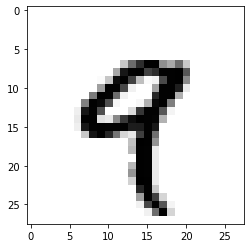

In [20]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [21]:
train_labels[4]

9

In [22]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [23]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [24]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [25]:
my_slice = train_images[:, 14:, 14:]

In [26]:
my_slice = train_images[:, 7:-7, 7:-7]

In [32]:
import numpy as np

In [36]:
def naive_relu(x):
    assert len(x.ndim) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [38]:
def naive_add(x, y):
    assert len(x.ndim) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [37]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))
print(z)

Took: 0.01 s
[[1.55200868 1.56252868 1.59612257 ... 1.78714772 0.95329558 0.50403889]
 [0.45941878 1.49258191 1.69343382 ... 0.86260737 1.58515456 1.0329293 ]
 [0.7417138  0.85325633 1.9742337  ... 1.40100745 0.7967363  1.89444562]
 ...
 [1.18766987 1.55756144 1.21364392 ... 1.23502776 1.75885733 1.24083108]
 [0.99149273 0.88528846 1.24770742 ... 1.19061046 0.60877617 0.92617517]
 [1.75718911 0.17810072 0.06048211 ... 0.14847915 1.79961706 1.5921917 ]]


In [34]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.32 s


In [39]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [40]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [41]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [42]:
x.shape[0]

32

In [43]:
y.shape[0]

32

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [27]:
keras()